In [25]:
from pathlib import Path

In [26]:
plot_base_path = Path(
    "/Users/larsankile/Library/CloudStorage/Dropbox/Apps/Overleaf/[CoRL 24] Robust Assembly from RL"
)

# Analyze Distillation Scaling

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv(
    "/data/scratch/ankile/robust-rearrangement/notebooks/data/scaling_low_1.csv"
)


df = df[["Name", "best_success_rate", "success_rate"]]

df.head()

,Name,best_success_rate,success_rate
0,state-rl-10050-19,0.742188,0.742188
1,state-rl-1050-17,0.703125,0.648438
2,rl-1050-7,0.640625,0.609375
3,rl-1050-15,0.656250,0.625000
4,bc-1050-8,0.226562,0.140625


In [14]:
df = df.assign(group_name=df.Name.str.split("-").str[:-1].str.join("-"))

df.head()

,Name,best_success_rate,success_rate,group_name
0,state-rl-10050-19,0.742188,0.742188,state-rl-10050
1,state-rl-1050-17,0.703125,0.648438,state-rl-1050
2,rl-1050-7,0.640625,0.609375,rl-1050
3,rl-1050-15,0.656250,0.625000,rl-1050
4,bc-1050-8,0.226562,0.140625,bc-1050


In [16]:
df = df.groupby("group_name").mean().reset_index()

df

,group_name,best_success_rate,success_rate
0,bc-1050,0.273438,0.156250
1,human-50,0.496094,0.339844
2,rl-1050,0.648438,0.617188
3,rl-300,0.691406,0.589844
4,rl-550,0.644531,0.542969
5,state-rl-10050,0.742188,0.742188
6,state-rl-1050,0.703125,0.648438


# Results 4.2 -- Scaling and BC/RL Distillation

## Scaling

In [1]:
import wandb
import matplotlib.pyplot as plt

In [2]:
api = wandb.Api(overrides={"entity": "robust-assembly"})

In [3]:
run_ids = dict(
    state_1k="45i0dikc",
    state_10k="mm93m3qx",
    state_50k="8joapjpv",
    state_100k="wi6t4u51",
)

project = "ol-vision-scaling-low-1"

In [4]:
# Get a project
runs = {name: api.run(f"{project}/{run_id}") for name, run_id in run_ids.items()}

In [5]:
best_success_rates = {
    name: run.summary["best_success_rate"] for name, run in runs.items()
}

best_success_rates

{'state_1k': 0.703125,
 'state_10k': 0.765625,
 'state_50k': 0.578125,
 'state_100k': 0.484375}

In [6]:
bc_success_rate = 0.54
rl_success_rate = 0.95

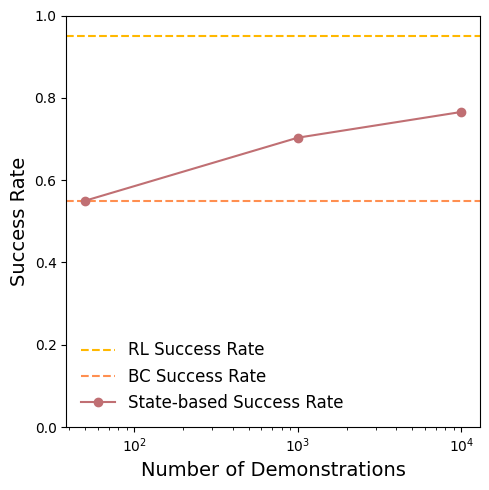

In [54]:
# Plot the state-based success rates as a line plot with the bc and rl success rates as horizontal lines
fig, ax = plt.subplots(figsize=(5, 5))

names, rates = zip(*best_success_rates.items())

# names = ["BC"] + list(names)
n_demos = [50, 1_000, 10_000, 50_000, 100_000][:-2]
rates = [bc_success_rate] + list(rates)[:-2]


ax.set_xlabel("Number of Demonstrations", fontsize=14)
ax.set_ylabel("Success Rate", fontsize=14)

# Set the x-axis to a log scale
ax.set_xscale("log")
ax.set_ylim(0, 1)

ax.axhline(rl_success_rate, color="#FFB800", linestyle="--", label="RL Success Rate")
ax.axhline(bc_success_rate, color="#FF8F50", linestyle="--", label="BC Success Rate")
ax.plot(n_demos, rates, marker="o", color="#C06F73", label="State-based Success Rate")

ax.legend(fontsize=12, frameon=False)

fig.tight_layout()

# Save the plot
plt.savefig("state_distillation_scaling.pdf")

## BC/RL Distillation

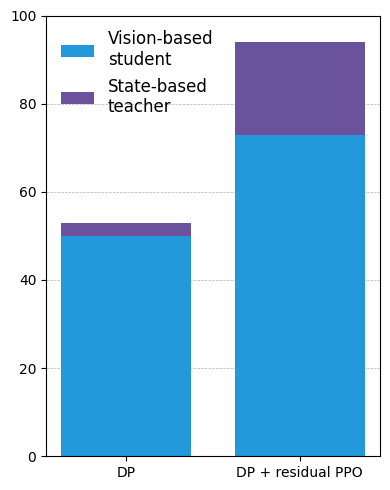

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ["DP", "DP + residual PPO"]
vision_based_student = [50, 73]
total = [53, 94]

# Calculate the state values
state_based_teacher = np.array(total) - np.array(vision_based_student)

# Set the width of each bar
bar_width = 0.75

# Set the positions of the bars on the x-axis
r = range(len(categories))

# Create the stacked bar plot
plt.figure(figsize=(4, 5))
plt.bar(
    r,
    vision_based_student,
    width=bar_width,
    label="Vision-based\nstudent",
    color="#2398DA",
    zorder=2,
)
plt.bar(
    r,
    state_based_teacher,
    width=bar_width,
    bottom=vision_based_student,
    label="State-based\nteacher",
    color="#6B529C",
    zorder=2,
)
plt.xticks(r, categories)

# Add legend
plt.legend(loc="upper left", fontsize=12, frameon=False)

# Add horizontal grid lines
plt.grid(axis="y", linestyle="--", linewidth=0.5, zorder=1)

# Set y-axis limits
plt.ylim(0, 100)

# Display the plot
plt.tight_layout()
plt.show()